In [11]:
import yaml
import pandas as pd

from utils.data_preprocessor import DataPreprocessor

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

testing_file_path: str = "../data/indicators/AAPL_indicators.csv"
test_df = pd.read_csv(testing_file_path)

test_processor = DataPreprocessor(test_df)

X_test = test_processor.X_testing_scaled
y_test = test_processor.y_batched

print("Testing Dataset shape:", test_df.shape)
print("Testing Dataset as time series batches:",X_test.shape, y_test.shape)


Testing Dataset shape: (5000, 13)
Testing Dataset as time series batches: (4970, 20, 14) (4970,)


<Axes: >

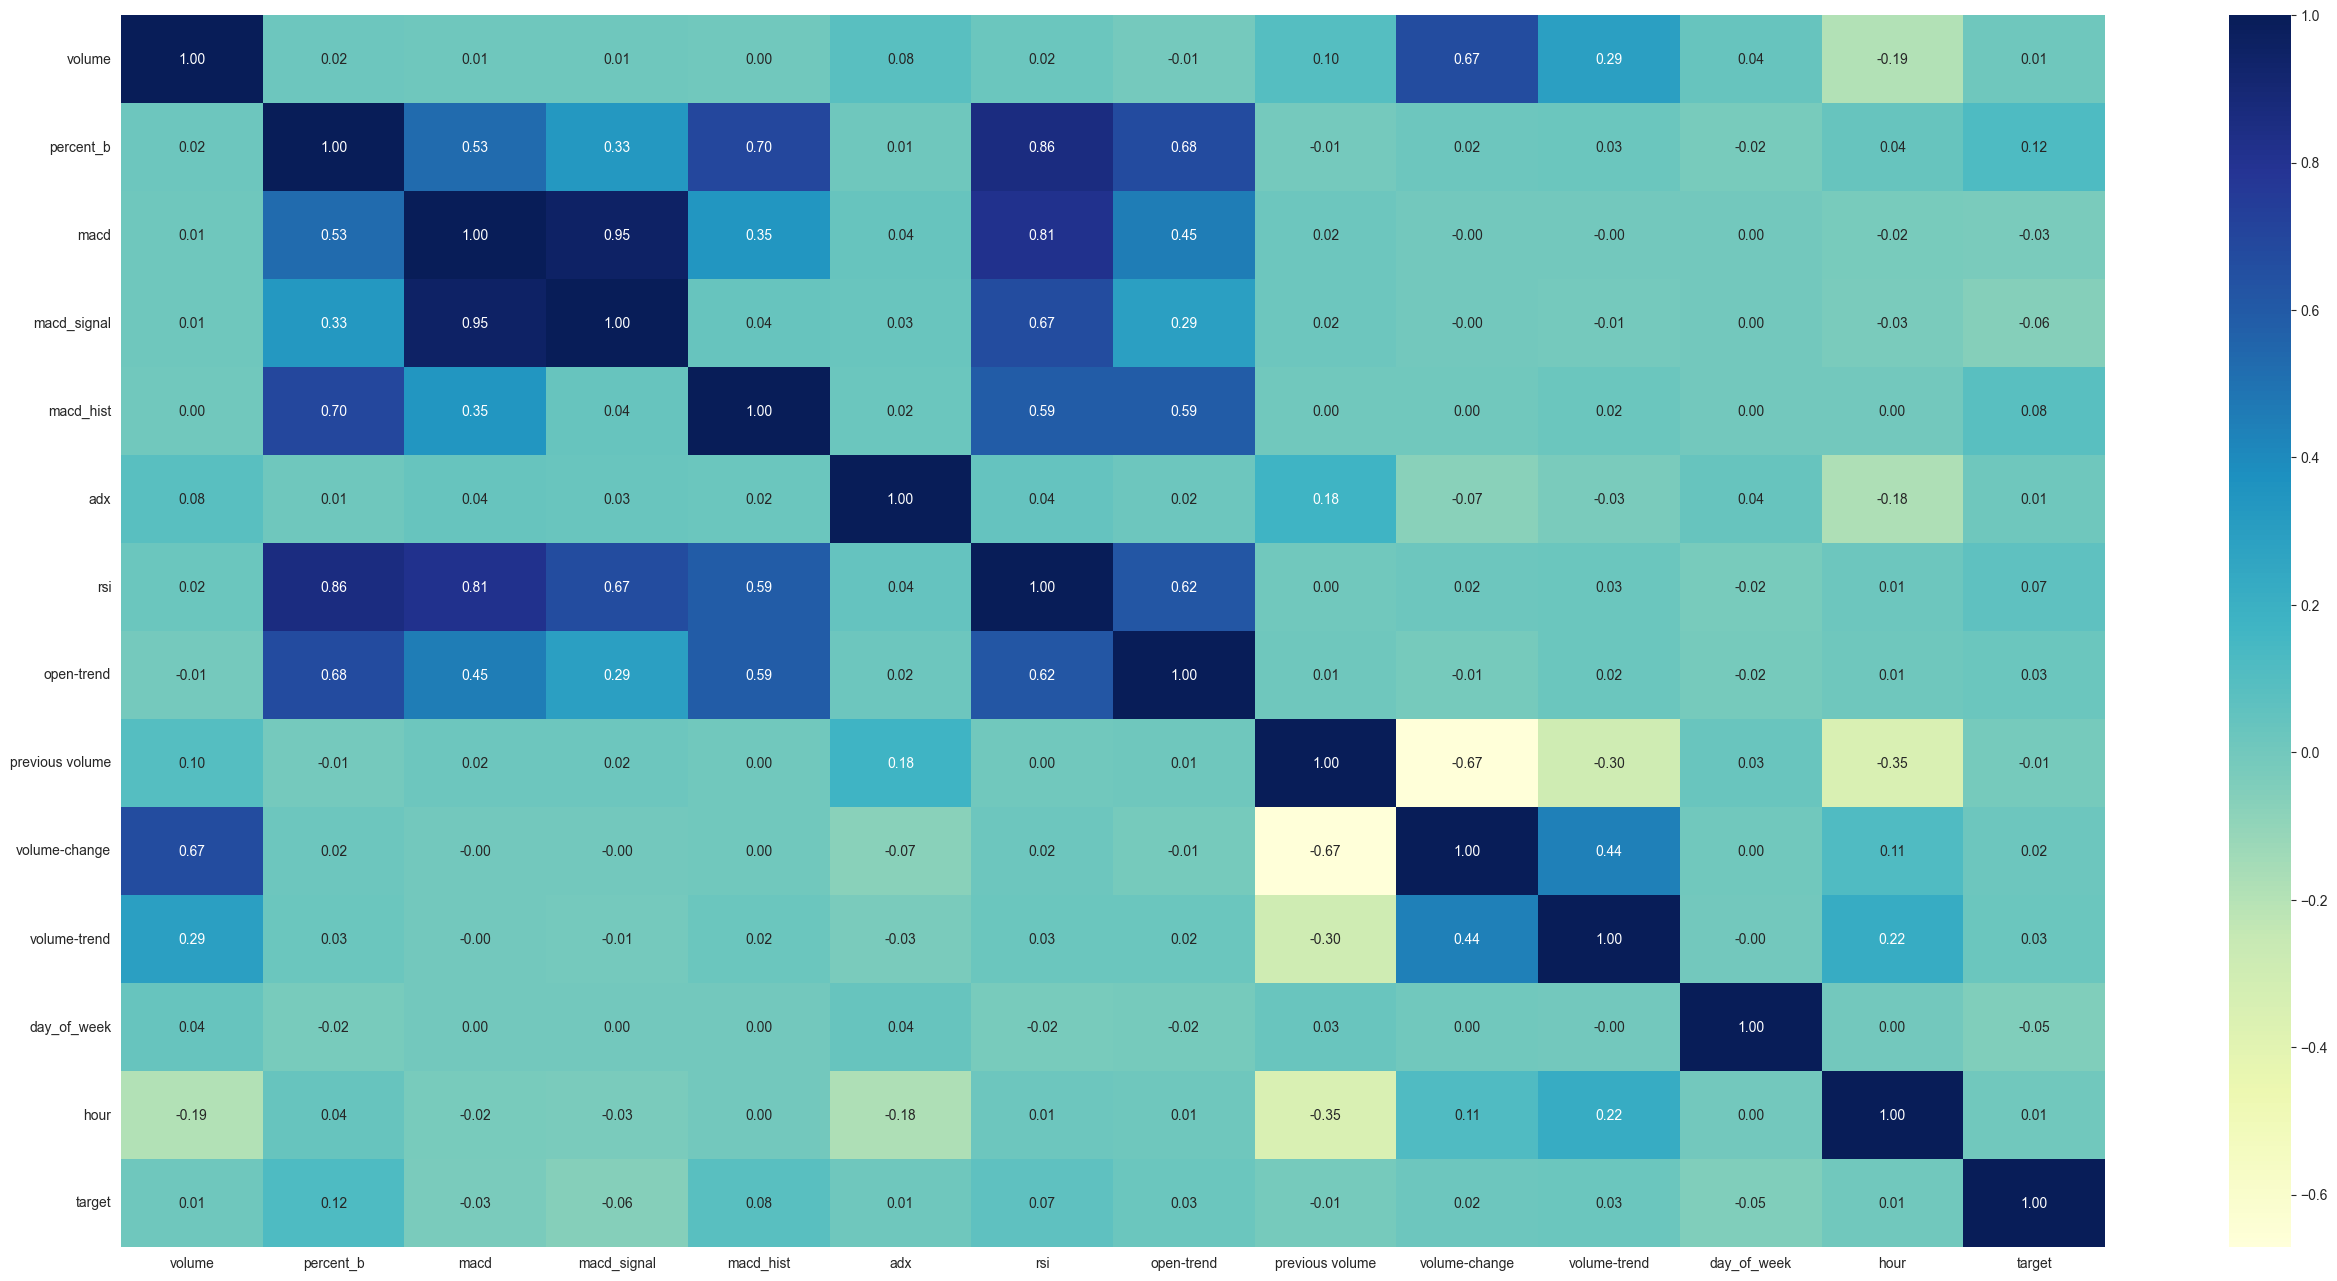

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(32,16))
sns.heatmap(test_processor.target_data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")

In [13]:
from sklearn.metrics import classification_report
from keras.models import load_model
from utils.model_evaluator import ModelEvaluator

model = load_model("../models/saved models/trained_StockTrendLSTM_model.keras")
test_loss, test_accuracy = model.evaluate(X_test, y_test)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

classification_report_output = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_report_output)

model_evaluator = ModelEvaluator(test_loss, y_test, y_pred)
metrics_df = model_evaluator.evaluation_metrics
metrics_df

156/156 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2339
           1       1.00      1.00      1.00      2631

    accuracy                           1.00      4970
   macro avg       1.00      1.00      1.00      4970
weighted avg       1.00      1.00      1.00      4970



,Metric,Score
0,Loss,0.015194
1,Accuracy,0.999396
2,Precision,1.000000
3,Recall,0.998860
4,F1Score,0.999430
5,ROC AUC,0.999430


In [14]:
test_processor.trend_data

,datetime,open,high,low,close,volume,percent_b,macd,macd_signal,macd_hist,adx,ema,rsi,previous open,open-change,open-trend,previous volume,volume-change,volume-trend
0,2023-09-22 12:10:00,176.37,176.51,176.30,176.40,434578,0.76,0.27,0.32,-0.05,38.03,176.26,63.78,0.00,0.00,1,0.0,0.0,1
1,2023-09-22 12:15:00,176.40,176.73,176.36,176.69,634098,1.10,0.29,0.31,-0.02,38.41,176.35,69.06,0.00,0.00,1,0.0,0.0,1
2,2023-09-22 12:20:00,176.70,176.75,176.53,176.59,484745,0.90,0.29,0.31,-0.02,38.80,176.40,65.51,0.00,0.00,1,0.0,0.0,1
3,2023-09-22 12:25:00,176.60,176.62,176.49,176.61,278819,0.88,0.29,0.31,-0.01,38.93,176.44,65.89,0.00,0.00,1,0.0,0.0,1
4,2023-09-22 12:30:00,176.62,176.79,176.57,176.63,421396,0.87,0.29,0.30,-0.01,39.45,176.48,66.39,0.00,0.00,1,0.0,0.0,1
5,2023-09-22 12:35:00,176.64,176.74,176.56,176.71,448146,0.92,0.29,0.30,-0.01,39.84,176.52,67.89,0.00,0.00,1,0.0,0.0,1
6,2023-09-22 12:40:00,176.71,176.80,176.70,176.79,352768,0.94,0.30,0.30,-0.00,40.36,176.58,69.37,0.00,0.00,1,0.0,0.0,1
7,2023-09-22 12:45:00,176.79,176.98,176.75,176.91,604088,0.99,0.31,0.30,0.00,41.28,176.64,71.79,0.00,0.00,1,0.0,0.0,1
8,2023-09-22 12:50:00,176.91,177.08,176.88,176.89,734731,0.91,0.31,0.30,0.01,42.32,176.69,70.56,0.00,0.00,1,0.0,0.0,1
9,2023-09-22 12:55:00,176.89,176.93,176.66,176.67,424513,0.68,0.29,0.30,-0.01,41.86,176.69,61.28,0.00,0.00,1,0.0,0.0,1


In [ ]:
y_actual = y_test

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

results_df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_pred.flatten(), 'Predicted_Prob': y_pred_prob.flatten()})
results_df

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

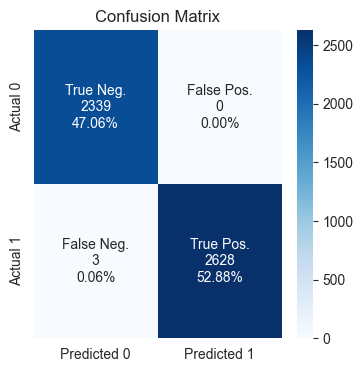

In [16]:
from utils.visualizing_service import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)